# **Análisis de secuencias de Sanger** 

## Simón Villanueva Corrales

La tecnología de secuenciación Sanger genera cromatrogramas a partir de los cuales es posible asignar la secuencia de nucleotidos que se haya procesado.

![Sanger](https://seqcore.brcf.med.umich.edu/sites/default/files/images/some_noise.gif)

Estos cromatrogramas suelen venir en archivos de formato .abi, y de ellos puede extraerse tanto la secuencia de nucleotidos como la calidad asociada a estos.

Biopython cuenta con la función X, la cual puede leer estos archivos para su posterior manipulación.

In [1]:
from Bio import SeqIO

In [2]:
record = SeqIO.read("sanger_DM/BBDCN941-10[C_LepFolF,C_LepFolR]_F.ab1","abi")

La secuencia cargada es la siguiente:

In [3]:
record.seq

Seq('NNNNNNNNNNNNNNNNNNNNNNGNTTGANCTGNNNNGTTGGAACATCTTTAAGA...NNN', IUPACUnambiguousDNA())

Pero no sólo se carga la secuencia, sino también muchos metadatos y anotaciones asociadas a ella

In [4]:
record.annotations.keys()

dict_keys(['sample_well', 'dye', 'polymer', 'machine_model', 'run_start', 'run_finish', 'abif_raw'])

In [5]:
record.annotations['abif_raw'].keys()

dict_keys(['AEPt1', 'AEPt2', 'APFN2', 'APXV1', 'APrN1', 'APrV1', 'APrX1', 'ARTN1', 'ASPF1', 'ASPt1', 'ASPt2', 'AUDT1', 'B1Pt1', 'B1Pt2', 'BCTS1', 'BufT1', 'CMNT1', 'CTID1', 'CTNM1', 'CTOw1', 'CTTL1', 'CpEP1', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12', 'DCHT1', 'DSam1', 'DySN1', 'Dye#1', 'DyeN1', 'DyeN2', 'DyeN3', 'DyeN4', 'DyeW1', 'DyeW2', 'DyeW3', 'DyeW4', 'EPVt1', 'EVNT1', 'EVNT2', 'EVNT3', 'EVNT4', 'FTab1', 'FVoc1', 'FWO_1', 'Feat1', 'GTyp1', 'HCFG1', 'HCFG2', 'HCFG3', 'HCFG4', 'InSc1', 'InVt1', 'LANE1', 'LIMS1', 'LNTD1', 'LsrP1', 'MCHN1', 'MODF1', 'MODL1', 'NAVG1', 'NLNE1', 'NOIS1', 'PBAS1', 'PBAS2', 'PCON1', 'PCON2', 'PDMF1', 'PDMF2', 'PLOC1', 'PLOC2', 'PSZE1', 'PTYP1', 'PXLB1', 'RGNm1', 'RGOw1', 'RMXV1', 'RMdN1', 'RMdV1', 'RMdX1', 'RPrN1', 'RPrV1', 'RUND1', 'RUND2', 'RUND3', 'RUND4', 'RUNT1', 'RUNT2', 'RUNT3', 'RUNT4', 'Rate1', 'RunN1', 'S/N%1', 'SCAN1', 'SMED1', 'SMLt1', 'SMPL1', 'SPAC1', 'SPAC2', 'SPAC3', 'SVER

De acuerdo a la especificación de datos de ABI, los datos normalmente mostrados en los canales se encuentran de `DATA9` a `DATA12` 

In [6]:
channels = ['DATA9', 'DATA10', 'DATA11', 'DATA12']
from collections import defaultdict
trace = defaultdict(list)

for c in channels:
     trace[c] = record.annotations['abif_raw'][c]

Ahora podemos ver el cromatograma usando `matplotlib`

In [7]:
import matplotlib.pyplot as plt

In [8]:
len(trace['DATA9'])

9353

Todo el cromatograma tiene un total de 9353 puntos. Si los graficamos todos juntos los datos estaran muy cerca y no se verian bien. Es por esto que haremos un zoom en una pequeña región.

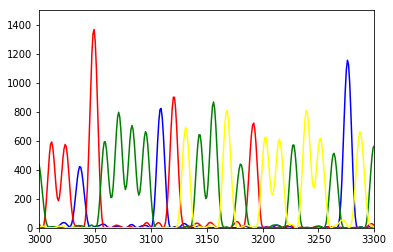

In [9]:
plt.plot(trace['DATA9'], color='blue')
plt.plot(trace['DATA10'], color='red')
plt.plot(trace['DATA11'], color='green')
plt.plot(trace['DATA12'], color='yellow')
plt.axis([3000,3300,0,1500])
plt.show()

Sanger es conocido, entre otras cosas, por tener poca resolución en los extremos. Veamos el principio y el final del cromatograma:

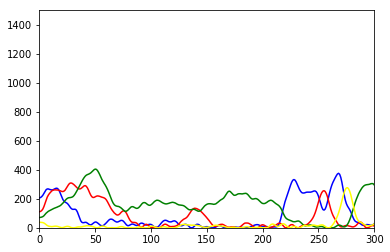

In [10]:
plt.plot(trace['DATA9'], color='blue')
plt.plot(trace['DATA10'], color='red')
plt.plot(trace['DATA11'], color='green')
plt.plot(trace['DATA12'], color='yellow')
plt.axis([0,300,0,1500])
plt.show()

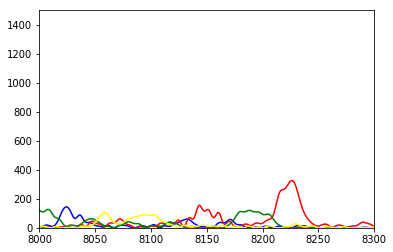

In [11]:
plt.plot(trace['DATA9'], color='blue')
plt.plot(trace['DATA10'], color='red')
plt.plot(trace['DATA11'], color='green')
plt.plot(trace['DATA12'], color='yellow')
plt.axis([8000,8300,0,1500])
plt.show()

Se puede ver que los picos son menos intensos y se distinguen menos los unos de los otros, por lo que disminuye su calidad y es más difícil asignar bases para esas regiones.

Por esta razón estas regiones suelen ser recortadas (trimmed)

La longitud de la secuencia antes de recortarla es:

In [13]:
len(record.seq)

687

In [14]:
record_trimmed = trimq(record)

La longitud de la secuencia después de recortarla es:

In [15]:
len(record_trimmed.seq)

582

Veamos ahora como se ven los cambios en la calidad(Phred score) de las secuencias:

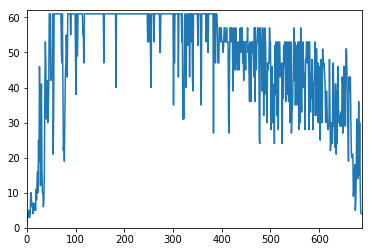

In [16]:
plt.plot(record.letter_annotations['phred_quality'])
plt.axis([0,len(record.seq),0,max(record.letter_annotations['phred_quality'])+1])
plt.show()

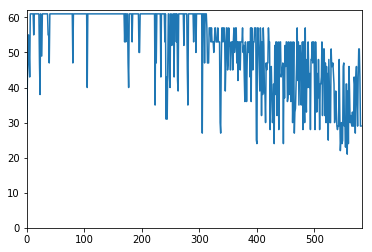

In [17]:
plt.plot(record_trimmed.letter_annotations['phred_quality'])
plt.axis([0,len(record_trimmed.seq),0,max(record_trimmed.letter_annotations['phred_quality'])+1])
plt.show()